In [24]:
import pandas as pd
data = {
    "Points": [18.0, 19.0, 14.0, 14.0, 11.0, 20.0, 28.0, 30.0, 31.0, 35.0, 
               33.0, 25.0, 25.0, 27.0, 29.0, 30.0, 19.0, 23.0],
    "Assists": [3.0, 4.0, 5.0, 4.0, 7.0, 8.0, 7.0, 6.0, 9.0, 12.0, 
                14.0, 9.0, 4.0, 3.0, 4.0, 12.0, 15.0, 11.0],
    "Rebounds": [15, 14, 10, 8, 14, 13, 9, 5, 4, 11, 
                 6, 5, 3, 8, 12, 7, 6, 5],
}
df = pd.DataFrame(data)


Using Euc Distance


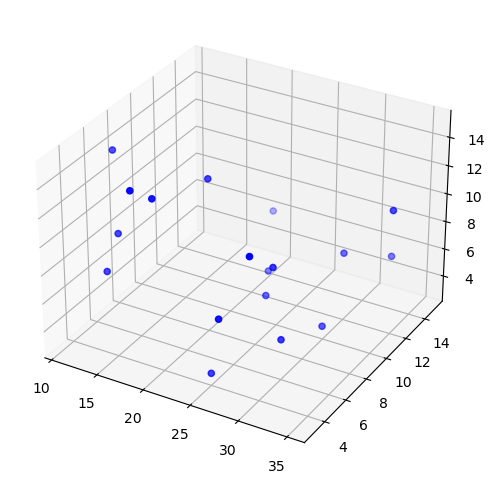

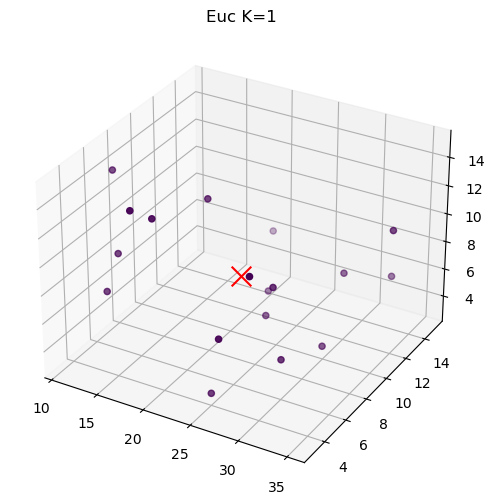

SSE K=1 Euc: 1347.5000000000002


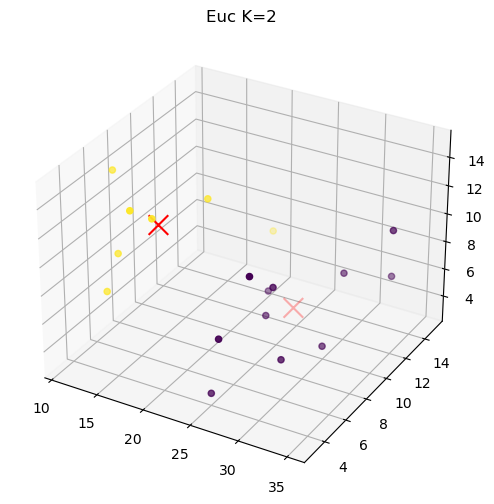

SSE K=2 Euc: 597.1428571428571


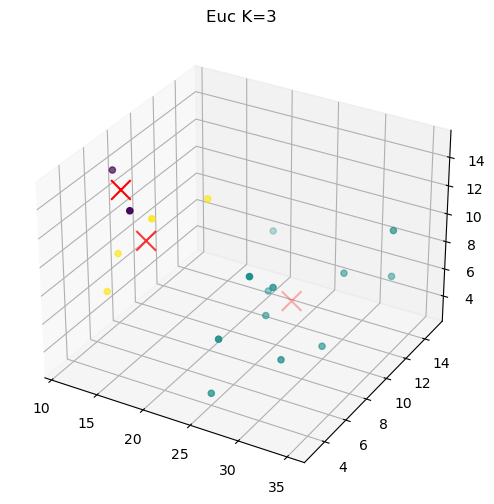

SSE K=3 Euc: 580.0833333333334


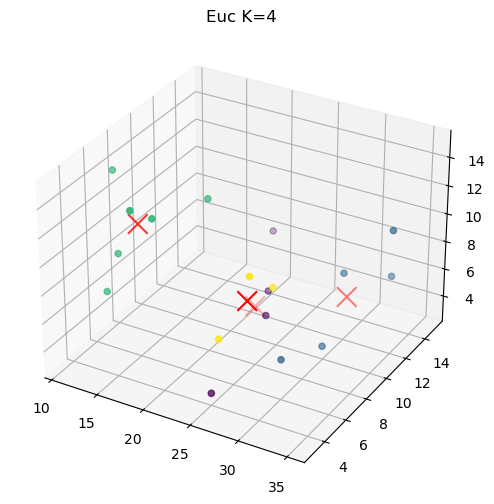

SSE K=4 Euc: 316.2


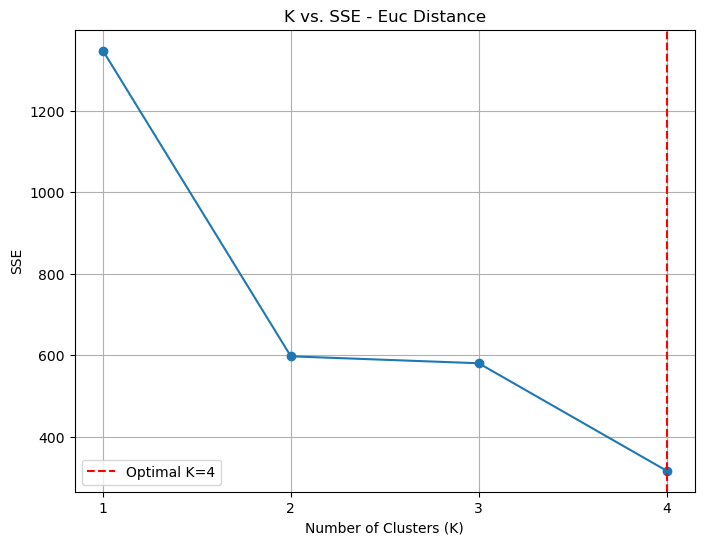


Using Man Distance


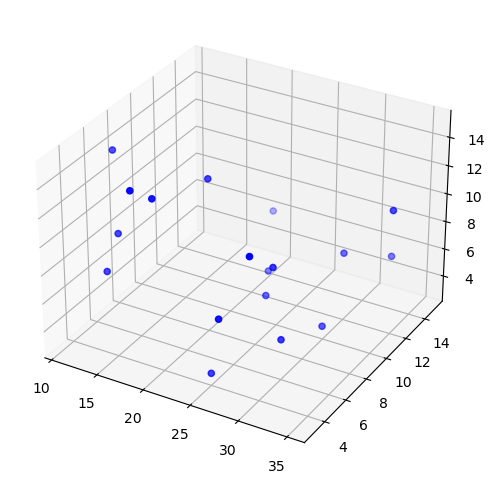

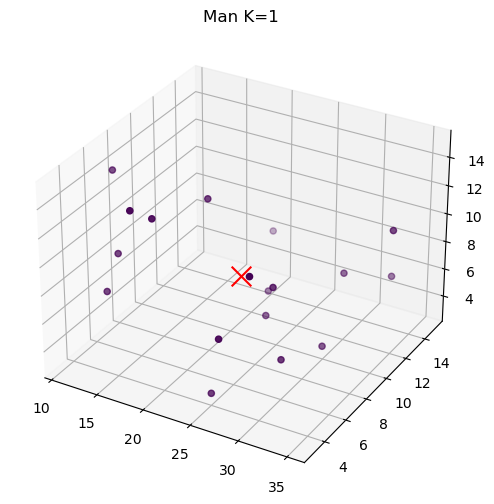

SSE K=1 Man: 49977.086419753105


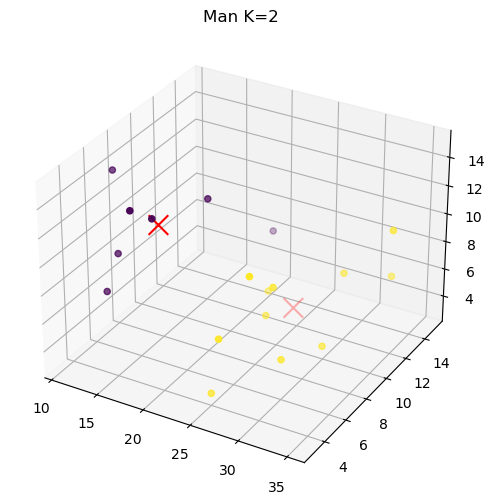

SSE K=2 Man: 12239.231573621184


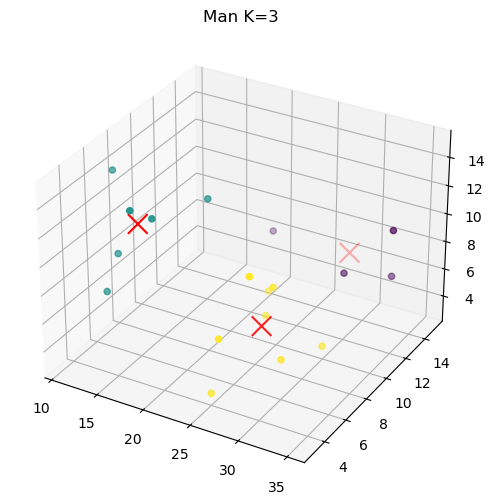

SSE K=3 Man: 5930.590277777778


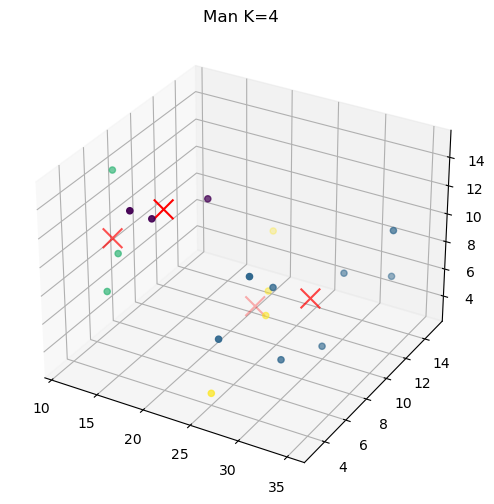

SSE K=4 Man: 4586.8125


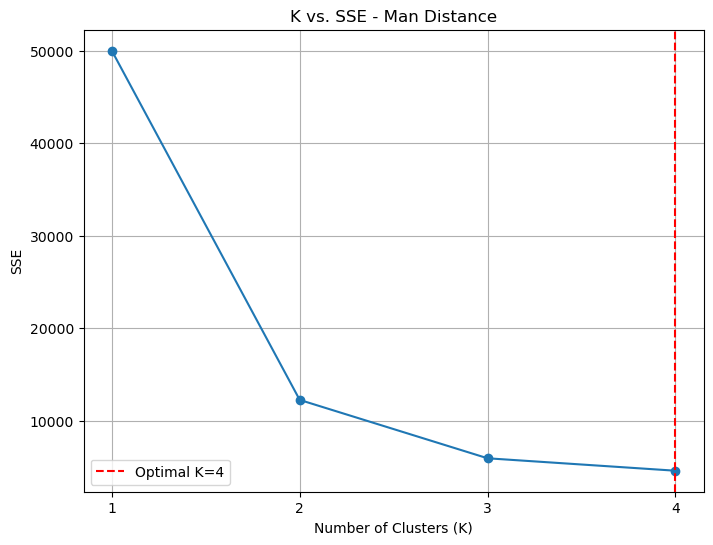


Using Mink (p=3) Distance


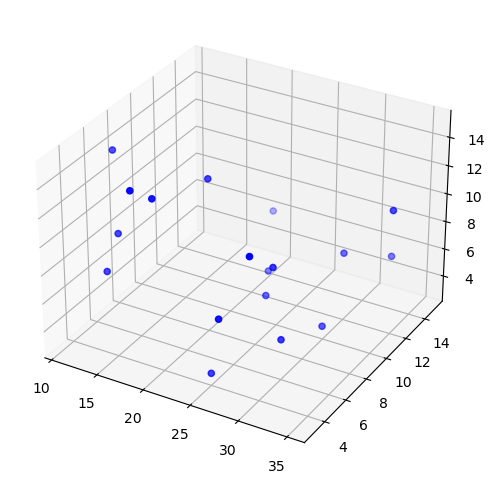

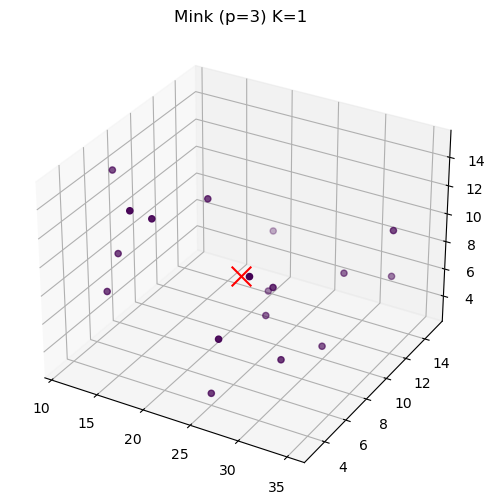

SSE K=1 Mink (p=3): 470.9457034302408


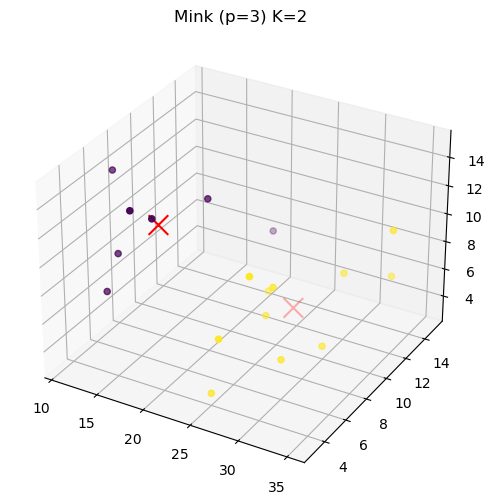

SSE K=2 Mink (p=3): 251.74591575673747


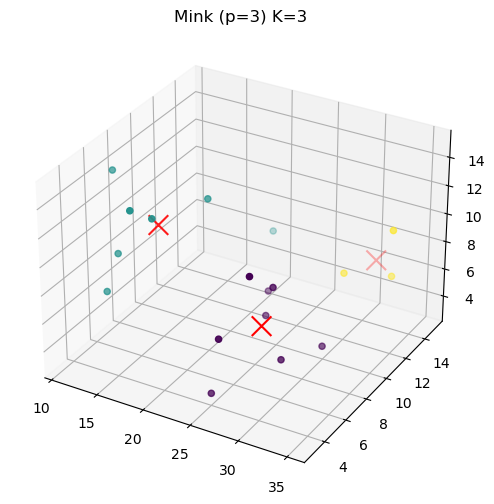

SSE K=3 Mink (p=3): 206.51761336218465


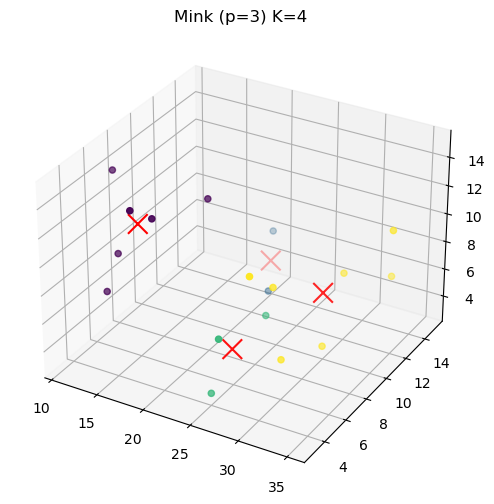

SSE K=4 Mink (p=3): 160.76432682910865


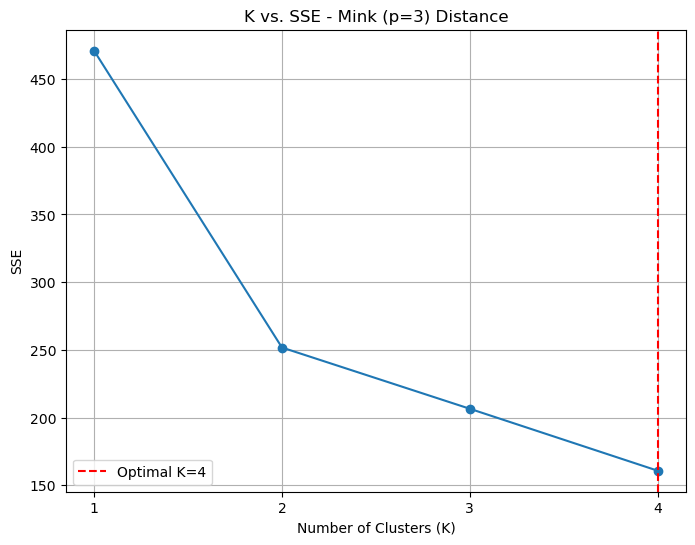

In [28]:
import numpy as np
import random
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
def init_c(X, k):
    return X[random.sample(range(X.shape[0]), k)]
def assign_c(X, c, d_func):
    dist = np.array([[d_func(x, centroid) for centroid in c] for x in X])
    return np.argmin(dist, axis=1)
def update_c(X, l, k):
    return np.array([X[l == i].mean(axis=0) for i in range(k)])
def kmeans(X, k, d_func, max_iters=100):
    c = init_c(X, k)
    for _ in range(max_iters):
        l = assign_c(X, c, d_func)
        new_c = update_c(X, l, k)
        if np.all(c == new_c):
            break
        c = new_c
    return l, c
def calc_sse(X, l, c, d_func):
    return sum(d_func(X[l == i], c[i]) ** 2 for i in range(len(c)))
def euc_dist(a, b):
    return np.linalg.norm(a - b)
def man_dist(a, b):
    return np.sum(np.abs(a - b))
def mink_dist(a, b, p=3):
    return np.sum(np.abs(a - b) ** p) ** (1/p)
k_values = [1, 2, 3, 4]
metrics = {
    "Euc": euc_dist,
    "Man": man_dist,
    "Mink (p=3)": lambda a, b: mink_dist(a, b, p=3),
}
for m_name, d_func in metrics.items():
    print(f"\nUsing {m_name} Distance")
    sse_list = []
    fig = plt.figure(figsize=(8, 6))
    ax = fig.add_subplot(111, projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], color='blue', marker='o')
    plt.show()
    for k in k_values:
        l, c = kmeans(X, k, d_func)
        sse = calc_sse(X, l, c, d_func)
        sse_list.append(sse)
        fig = plt.figure(figsize=(8, 6))
        ax = fig.add_subplot(111, projection='3d')
        ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=l, cmap='viridis', marker='o')
        ax.scatter(c[:, 0], c[:, 1], c[:, 2], c='red', marker='x', s=200, label='Centroids')
        ax.set_title(f'{m_name} K={k}')
        plt.show()
        print(f"SSE K={k} {m_name}: {sse}")
    optimal_k = k_values[sse_list.index(min(sse_list))]
    plt.figure(figsize=(8, 6))
    plt.plot(k_values, sse_list, marker='o')
    plt.axvline(x=optimal_k, color='red', linestyle='--', label=f'Optimal K={optimal_k}')
    plt.title(f'K vs. SSE - {m_name} Distance')
    plt.xlabel('K')
    plt.ylabel('SSE')
    plt.legend()
    plt.grid()
    plt.xticks(k_values)
    plt.show()